In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

In [2]:
real_estate = pd.read_csv(r"/Users/wilson/Desktop/Wilson/Python Course/Tony_Course/教材/course_data/Real estate.csv")

In [3]:
real_estate.info() # 觀察資料 => 無遺漏值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
real_estate

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [5]:
real_estate.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [6]:
# drop掉NO(無意義欄位)
real_estate.drop("No", axis=1, inplace=True)

In [7]:
# 刪除前贅字
real_estate.columns = [col_name[2:].strip() for col_name in real_estate.columns]

In [8]:
real_estate["transaction date"] = real_estate["transaction date"].astype("int")

In [9]:
real_estate["transaction date"].unique()

array([2012, 2013])

<AxesSubplot:xlabel='distance to the nearest MRT station', ylabel='house price of unit area'>

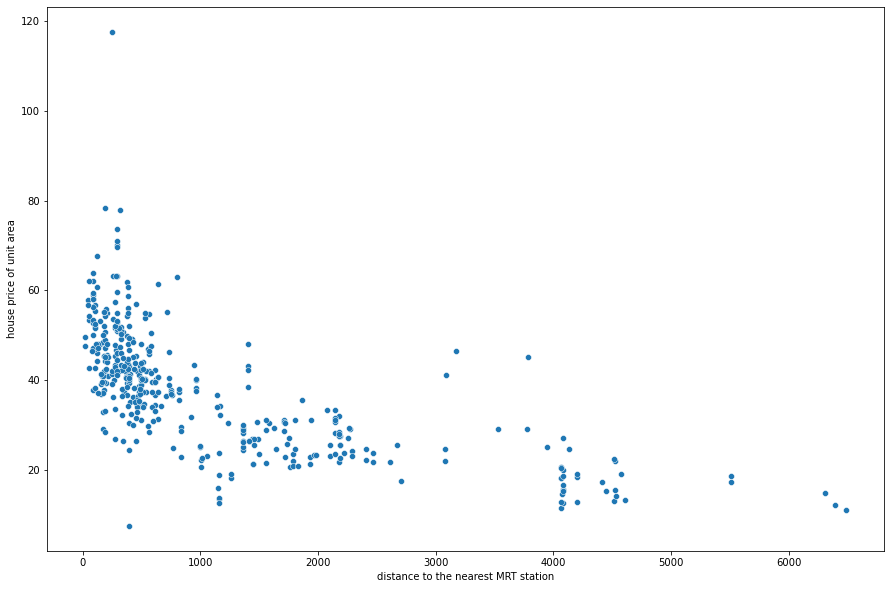

In [10]:
#原始圖表，未控制數據
plt.figure(figsize=(15,10))
sns.scatterplot(x="distance to the nearest MRT station", y="house price of unit area", data=real_estate)

(0.0, 3000.0)

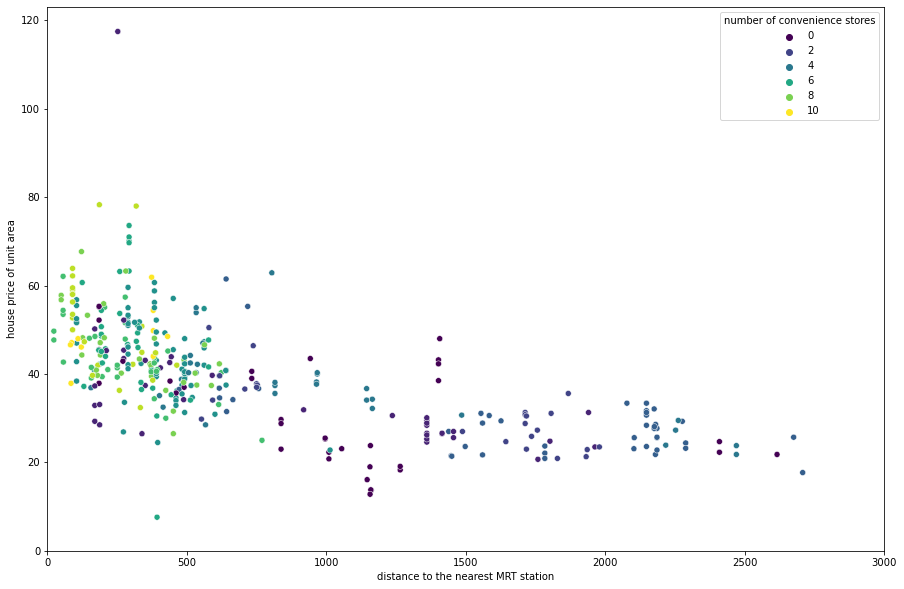

In [11]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="distance to the nearest MRT station", y="house price of unit area", data=real_estate,hue ="number of convenience stores",palette="viridis")
plt.ylim(0, None)
plt.xlim(0, 3000)

In [12]:
sns.color_palette("viridis", as_cmap=False)

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

(0.0, 3000.0)

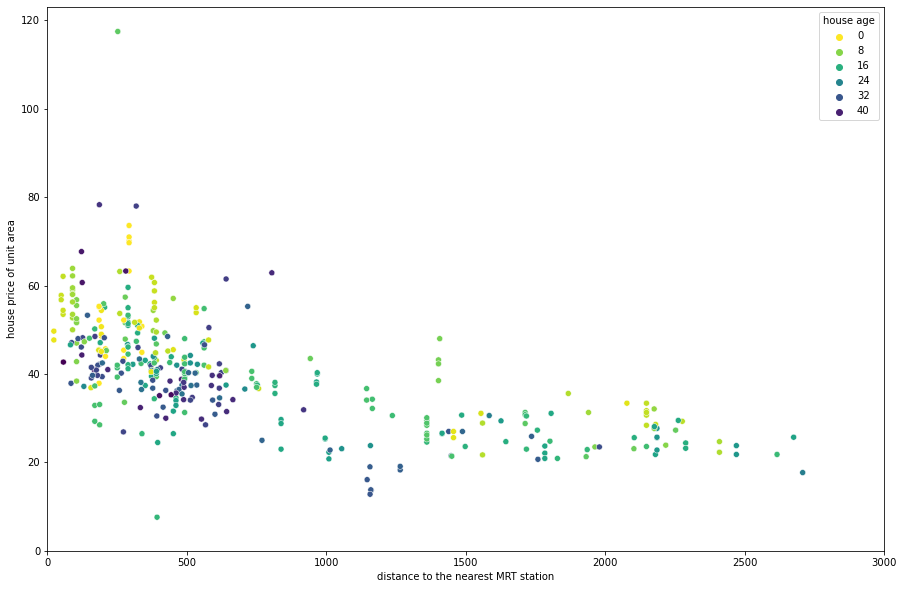

In [13]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="distance to the nearest MRT station", y="house price of unit area", data=real_estate,
                hue ="house age",
                palette="viridis_r")
plt.ylim(0, None)
plt.xlim(0, 3000)

In [14]:
real_estate["store(3~7)"] = real_estate["distance to the nearest MRT station"][(real_estate["number of convenience stores"]>2)&\
                            (real_estate["number of convenience stores"]<8)]

(0.0, 3000.0)

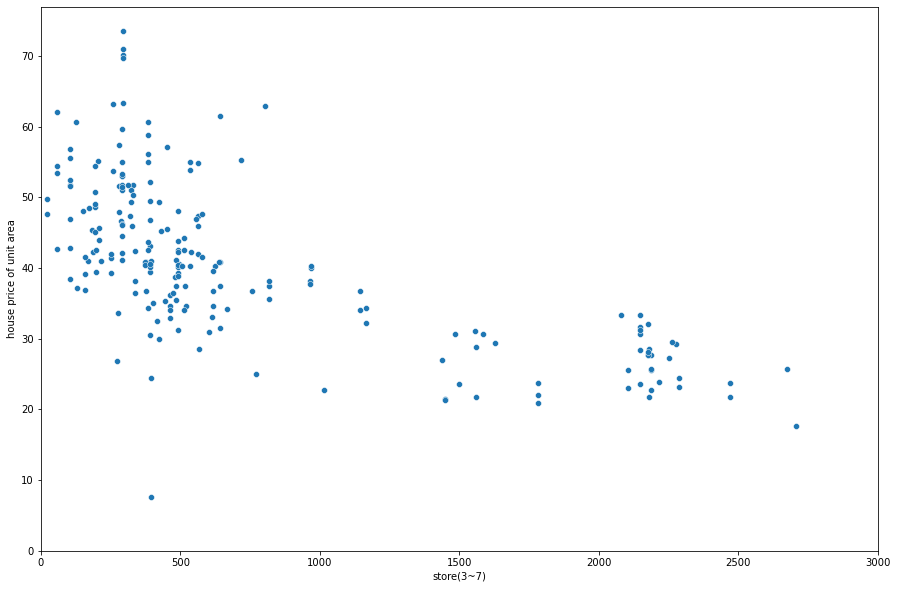

In [15]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="store(3~7)", y="house price of unit area", data=real_estate,palette="viridis")
plt.ylim(0, None)
plt.xlim(0, 3000)

In [16]:
real_estate.drop(["store(3~7)"],axis=1,inplace=True)

In [17]:
#drop掉離群值
real_estate1 = real_estate.drop(index=[113,270])

In [18]:
real_estate[(real_estate["distance to the nearest MRT station"]<1300)\
            &(real_estate["distance to the nearest MRT station"]>1250)]

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
156,2013,30.7,1264.73,0,24.94883,121.52954,18.3
309,2013,30.3,1264.73,0,24.94883,121.52954,19.1


In [19]:
real_estate[(real_estate["distance to the nearest MRT station"]<1400)\
            &(real_estate["distance to the nearest MRT station"]>1265)]

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
22,2012,14.7,1360.139,1,24.95204,121.54842,24.6
37,2013,12.0,1360.139,1,24.95204,121.54842,25.3
75,2013,12.3,1360.139,1,24.95204,121.54842,29.5
107,2013,12.2,1360.139,1,24.95204,121.54842,26.6
144,2013,11.9,1360.139,1,24.95204,121.54842,28.4
152,2013,12.0,1360.139,1,24.95204,121.54842,28.9
208,2012,11.5,1360.139,1,24.95204,121.54842,26.2
354,2013,12.2,1360.139,1,24.95204,121.54842,30.1


In [20]:
real_estate[real_estate["house price of unit area"]<10]

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
113,2013,14.8,393.2606,6,24.96172,121.53812,7.6


In [21]:
from rdd import rdd

In [22]:
#980
threshold = 980

In [23]:
bandwidth_opt = rdd.optimal_bandwidth(real_estate["house price of unit area"],
                                      real_estate["distance to the nearest MRT station"], cut = threshold)
print("Optimal bandwidth", bandwidth_opt)

Optimal bandwidth 14.21622706683685


In [24]:
data_rdd = rdd.truncated_data(real_estate, "distance to the nearest MRT station", 100, cut=threshold)

In [25]:
data_rdd

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
64,2013,17.5,995.7554,0,24.96305,121.54915,25.3
100,2013,17.5,964.7496,4,24.98872,121.53411,38.2
135,2012,18.9,1009.2350,0,24.96357,121.54951,20.8
138,2013,10.0,942.4664,0,24.97843,121.52406,43.5
200,2013,17.4,995.7554,0,24.96305,121.54915,25.5
247,2013,21.7,1055.0670,0,24.96211,121.54928,23.1
248,2013,19.0,1009.2350,0,24.96357,121.54951,22.3
321,2012,16.9,964.7496,4,24.98872,121.53411,37.7
334,2012,30.0,1013.3410,5,24.99006,121.53460,22.8
362,2013,17.1,967.4000,4,24.98872,121.53408,40.0


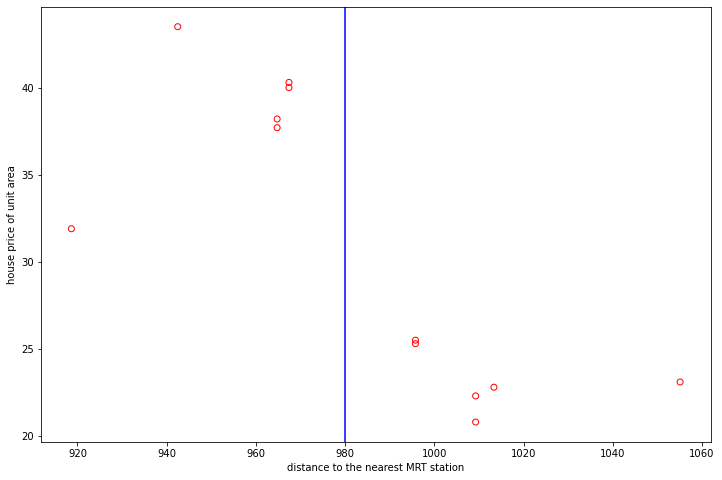

In [26]:
plt.figure(figsize=(12, 8))
plt.scatter(data_rdd["distance to the nearest MRT station"],
            data_rdd["house price of unit area"], facecolors='none', edgecolors='r')
plt.xlabel("distance to the nearest MRT station")
plt.ylabel("house price of unit area")
plt.axvline(x=threshold, color='b')
plt.show()
plt.close()

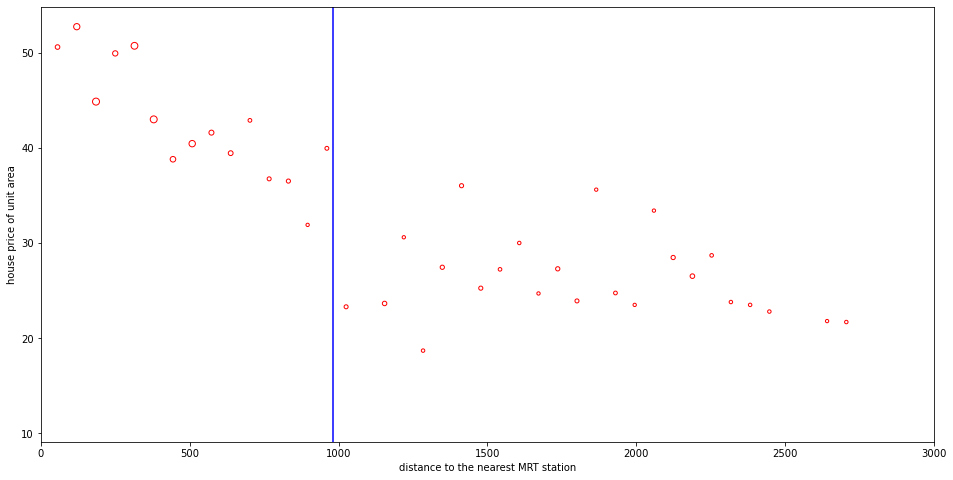

In [27]:
data_binned = rdd.bin_data(real_estate, "house price of unit area", "distance to the nearest MRT station", 100)

plt.figure(figsize=(16, 8))
plt.scatter(data_binned["distance to the nearest MRT station"], data_binned["house price of unit area"],
     s = data_binned['n_obs']+10,facecolors='none', edgecolors='r')
plt.axvline(x=threshold, color='b')
plt.xlabel("distance to the nearest MRT station")
plt.ylabel("house price of unit area")
plt.xlim([0,3000])
plt.show()

So what we'll do is put the data into bins based on the running variable, get the average value of the outcome variable in each bin.( bin=100 )

In [28]:
real_estate[(real_estate["distance to the nearest MRT station"]<1000)\
            &(real_estate["distance to the nearest MRT station"]>960)]\
            .sort_values(["distance to the nearest MRT station"])

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
100,2013,17.5,964.7496,4,24.98872,121.53411,38.2
321,2012,16.9,964.7496,4,24.98872,121.53411,37.7
362,2013,17.1,967.4000,4,24.98872,121.53408,40.0
393,2013,16.9,967.4000,4,24.98872,121.53408,40.3
64,2013,17.5,995.7554,0,24.96305,121.54915,25.3
200,2013,17.4,995.7554,0,24.96305,121.54915,25.5


In [29]:
bandwidth_opt = rdd.optimal_bandwidth(real_estate1["house price of unit area"],
                                      real_estate1["distance to the nearest MRT station"], cut = 980)
print("Optimal bandwidth", bandwidth_opt)

Optimal bandwidth 14.093691273930405


In [30]:
data_rdd1 = rdd.truncated_data(real_estate1, "distance to the nearest MRT station", bandwidth=30, cut=threshold)

In [31]:
data_rdd1

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
64,2013,17.5,995.7554,0,24.96305,121.54915,25.3
100,2013,17.5,964.7496,4,24.98872,121.53411,38.2
135,2012,18.9,1009.2350,0,24.96357,121.54951,20.8
200,2013,17.4,995.7554,0,24.96305,121.54915,25.5
248,2013,19.0,1009.2350,0,24.96357,121.54951,22.3
321,2012,16.9,964.7496,4,24.98872,121.53411,37.7
362,2013,17.1,967.4000,4,24.98872,121.53408,40.0
393,2013,16.9,967.4000,4,24.98872,121.53408,40.3


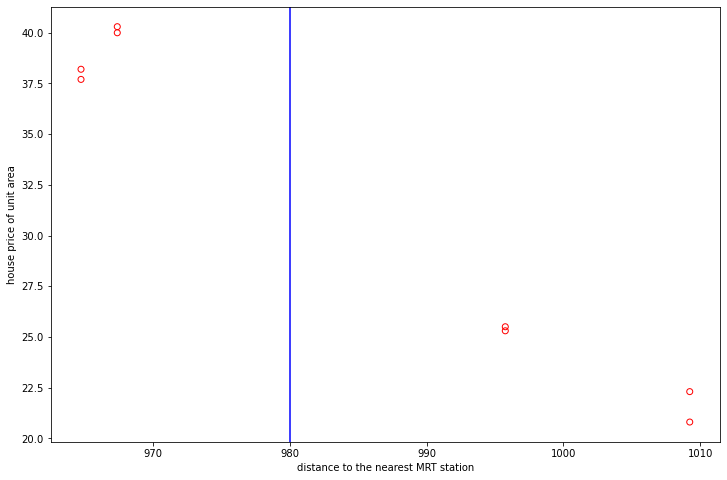

In [32]:
plt.figure(figsize=(12, 8))
plt.scatter(data_rdd1["distance to the nearest MRT station"],
            data_rdd1["house price of unit area"], facecolors='none', edgecolors='r')
plt.xlabel("distance to the nearest MRT station")
plt.ylabel("house price of unit area")
plt.axvline(x=threshold, color='b')
plt.show()
plt.close()

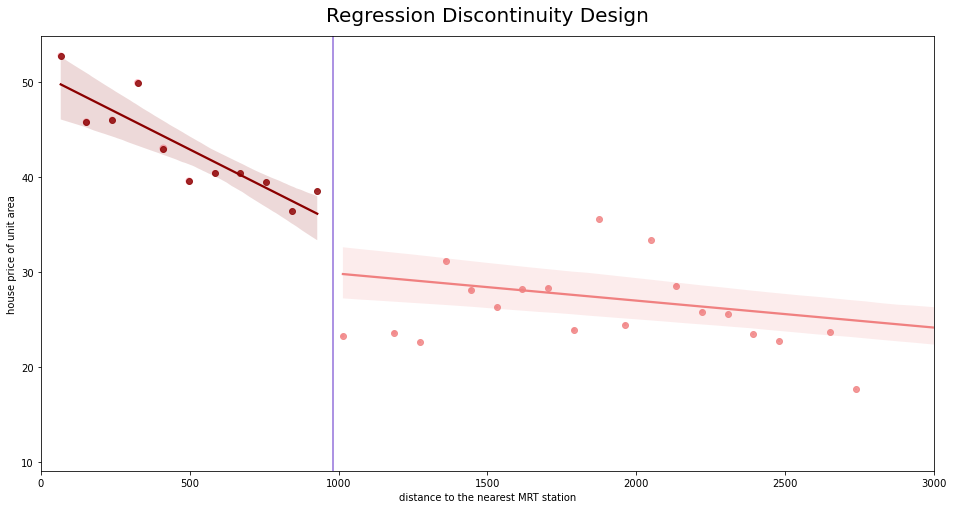

In [33]:
data_binned1 = rdd.bin_data(real_estate1, "house price of unit area", "distance to the nearest MRT station", 75)

plt.figure(figsize=(16, 8))
plt.scatter(data_binned1["distance to the nearest MRT station"], data_binned1["house price of unit area"],
     s = data_binned1['n_obs'],facecolors='lightpink', edgecolors='lightpink')
plt.axvline(x=threshold, color='mediumpurple')
plt.xlabel("distance to the nearest MRT station")
plt.ylabel("house price of unit area")
plt.xlim([0,3000])
sns.regplot(x=data_binned1["distance to the nearest MRT station"][data_binned1["distance to the nearest MRT station"]<1000],
            y=data_binned1["house price of unit area"][data_binned1["distance to the nearest MRT station"]<1000],
            color="darkred", data=real_estate1)

sns.regplot(x=data_binned1["distance to the nearest MRT station"][data_binned1["distance to the nearest MRT station"]>1000],
            y=data_binned1["house price of unit area"][data_binned1["distance to the nearest MRT station"]>1000],
            color="lightcoral", data=real_estate1)
plt.title("Regression Discontinuity Design", size=20, loc = "center", y =1.02)
plt.show()

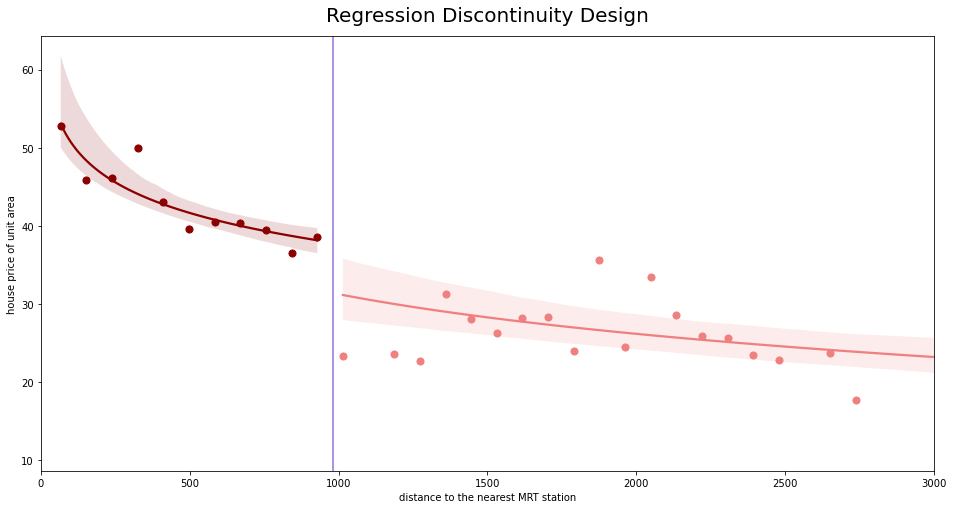

In [49]:
data_binned1 = rdd.bin_data(real_estate1, "house price of unit area", "distance to the nearest MRT station", 75)

plt.figure(figsize=(16, 8))
plt.scatter(data_binned1["distance to the nearest MRT station"], data_binned1["house price of unit area"],
     s = data_binned1['n_obs'],facecolors='lightpink', edgecolors='lightpink')
plt.axvline(x=threshold, color='mediumpurple')
plt.xlabel("distance to the nearest MRT station")
plt.ylabel("house price of unit area")

plt.xlim([0,3000])

ax = sns.regplot(x=data_binned1["distance to the nearest MRT station"][data_binned1["distance to the nearest MRT station"]<1000],
            y=data_binned1["house price of unit area"][data_binned1["distance to the nearest MRT station"]<1000],
            color="darkred", x_estimator=np.mean, logx=True, data=real_estate1)


sns.regplot(x=data_binned1["distance to the nearest MRT station"][data_binned1["distance to the nearest MRT station"]>1000],
            y=data_binned1["house price of unit area"][data_binned1["distance to the nearest MRT station"]>1000],
            color="lightcoral", x_estimator=np.mean, logx=True, data=real_estate1)

plt.title("Regression Discontinuity Design", size=20, loc = "center", y =1.02)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:301: RuntimeWarning: divide by zero encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]


Text(0, 0.5, 'house price of unit area')

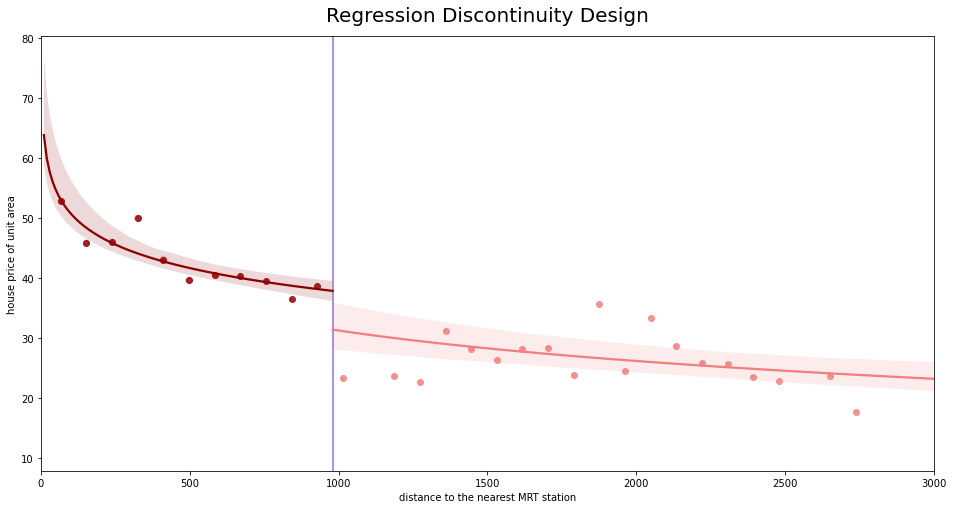

In [63]:
data_binned1 = rdd.bin_data(real_estate1, "house price of unit area", "distance to the nearest MRT station", 75)

plt.figure(figsize=(16, 8))
plt.scatter(data_binned1["distance to the nearest MRT station"], data_binned1["house price of unit area"],
     s = data_binned1['n_obs'],facecolors='lightpink', edgecolors='lightpink')
plt.axvline(x=threshold, color='mediumpurple')

plt.xlim([0,980])

ax = sns.regplot(x=data_binned1["distance to the nearest MRT station"][data_binned1["distance to the nearest MRT station"]<1000],
            y=data_binned1["house price of unit area"][data_binned1["distance to the nearest MRT station"]<1000],
            color="darkred",logx=True, truncate=False, data=real_estate1)

ax.set_xlim([980,3000])

sns.regplot(x=data_binned1["distance to the nearest MRT station"][data_binned1["distance to the nearest MRT station"]>1000],
            y=data_binned1["house price of unit area"][data_binned1["distance to the nearest MRT station"]>1000],
            color="lightcoral", logx=True, truncate=False, data=real_estate1)


plt.xlim([0,3000])

plt.title("Regression Discontinuity Design", size=20, loc = "center", y =1.02)
plt.xlabel("distance to the nearest MRT station")
plt.ylabel("house price of unit area")

{23.4: 58.9,
 33.0: 57.0,
 42.5: 55.6,
 52.1: 54.4,
 61.7: 53.5,
 71.3: 52.7,
 80.8: 51.9,
 90.4: 51.3,
 100.0: 50.7,
 109.6: 50.2,
 119.2: 49.8,
 128.7: 49.3,
 138.3: 48.9,
 147.9: 48.5,
 157.5: 48.2,
 167.0: 47.8,
 176.6: 47.5,
 186.2: 47.2,
 195.8: 46.9,
 205.4: 46.7,
 214.9: 46.4,
 224.5: 46.2,
 234.1: 45.9,
 243.7: 45.7,
 253.2: 45.5,
 262.8: 45.3,
 272.4: 45.1,
 282.0: 44.9,
 291.5: 44.7,
 301.1: 44.5,
 310.7: 44.3,
 320.3: 44.2,
 329.9: 44.0,
 339.4: 43.8,
 349.0: 43.7,
 358.6: 43.5,
 368.2: 43.4,
 377.7: 43.2,
 387.3: 43.1,
 396.9: 43.0,
 406.5: 42.8,
 416.0: 42.7,
 425.6: 42.6,
 435.2: 42.4,
 444.8: 42.3,
 454.4: 42.2,
 463.9: 42.1,
 473.5: 42.0,
 483.1: 41.8,
 492.7: 41.7,
 502.2: 41.6,
 511.8: 41.5,
 521.4: 41.4,
 531.0: 41.3,
 540.6: 41.2,
 550.1: 41.1,
 559.7: 41.0,
 569.3: 40.9,
 578.9: 40.8,
 588.4: 40.7,
 598.0: 40.6,
 607.6: 40.6,
 617.2: 40.5,
 626.7: 40.4,
 636.3: 40.3,
 645.9: 40.2,
 655.5: 40.1,
 665.1: 40.0,
 674.6: 40.0,
 684.2: 39.9,
 693.8: 39.8,
 703.4: 39.7,


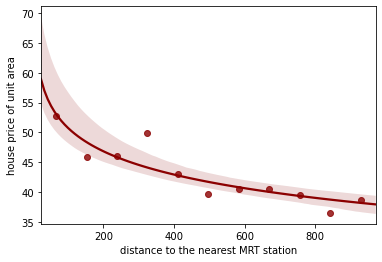

In [86]:
p1 = sns.regplot(x=data_binned1["distance to the nearest MRT station"][data_binned1["distance to the nearest MRT station"]<1000],
            y=data_binned1["house price of unit area"][data_binned1["distance to the nearest MRT station"]<1000],
            color="darkred", logx=True, truncate=False, data=real_estate1)


line1 = dict(zip(p1.get_lines()[0].get_xdata().round(1),p1.get_lines()[0].get_ydata().round(1)))

line1

{743.1: 33.4,
 803.4: 32.9,
 863.8: 32.3,
 924.1: 31.8,
 984.5: 31.4,
 1044.8: 30.9,
 1105.1: 30.5,
 1165.5: 30.1,
 1225.8: 29.8,
 1286.1: 29.4,
 1346.5: 29.1,
 1406.8: 28.8,
 1467.2: 28.5,
 1527.5: 28.2,
 1587.8: 27.9,
 1648.2: 27.6,
 1708.5: 27.3,
 1768.8: 27.1,
 1829.2: 26.8,
 1889.5: 26.6,
 1949.8: 26.4,
 2010.2: 26.2,
 2070.5: 25.9,
 2130.9: 25.7,
 2191.2: 25.5,
 2251.5: 25.3,
 2311.9: 25.1,
 2372.2: 24.9,
 2432.5: 24.8,
 2492.9: 24.6,
 2553.2: 24.4,
 2613.5: 24.2,
 2673.9: 24.1,
 2734.2: 23.9,
 2794.6: 23.7,
 2854.9: 23.6,
 2915.2: 23.4,
 2975.6: 23.3,
 3035.9: 23.1,
 3096.2: 23.0,
 3156.6: 22.9,
 3216.9: 22.7,
 3277.3: 22.6,
 3337.6: 22.4,
 3397.9: 22.3,
 3458.3: 22.2,
 3518.6: 22.1,
 3578.9: 21.9,
 3639.3: 21.8,
 3699.6: 21.7,
 3759.9: 21.6,
 3820.3: 21.5,
 3880.6: 21.3,
 3941.0: 21.2,
 4001.3: 21.1,
 4061.6: 21.0,
 4122.0: 20.9,
 4182.3: 20.8,
 4242.6: 20.7,
 4303.0: 20.6,
 4363.3: 20.5,
 4423.6: 20.4,
 4484.0: 20.3,
 4544.3: 20.2,
 4604.7: 20.1,
 4665.0: 20.0,
 4725.3: 19.9,


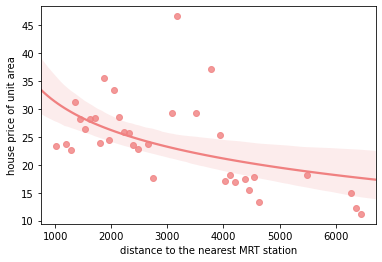

In [89]:
p2 = sns.regplot(x=data_binned1["distance to the nearest MRT station"][data_binned1["distance to the nearest MRT station"]>1000],
            y=data_binned1["house price of unit area"][data_binned1["distance to the nearest MRT station"]>1000],
            color="lightcoral", logx=True, truncate=False, data=real_estate1)

line2 = dict(zip(p2.get_lines()[0].get_xdata().round(1),p2.get_lines()[0].get_ydata().round(1)))

line2

In [96]:
print("intercept: {0} - {1} = {2}".format(line1[980],line2[980],(line1[980]-line2[980])))

intercept: 37.9 - 31.4 = 6.5


In [429]:
##

In [490]:
real_estate1

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area,store(3~7)
0,2012,32.0,84.87882,10,24.98298,121.54024,37.9,NaN
1,2012,19.5,306.59470,9,24.98034,121.53951,42.2,NaN
2,2013,13.3,561.98450,5,24.98746,121.54391,47.3,561.9845
3,2013,13.3,561.98450,5,24.98746,121.54391,54.8,561.9845
4,2012,5.0,390.56840,5,24.97937,121.54245,43.1,390.5684
...,...,...,...,...,...,...,...,...
409,2013,13.7,4082.01500,0,24.94155,121.50381,15.4,NaN
410,2012,5.6,90.45606,9,24.97433,121.54310,50.0,NaN
411,2013,18.8,390.96960,7,24.97923,121.53986,40.6,390.9696
412,2013,8.1,104.81010,5,24.96674,121.54067,52.5,104.8101


In [509]:
real_estate1["house_price_of_unit_area"] = real_estate1["house price of unit area"].to_numpy()

In [511]:
real_estate1["distance_to_the_nearest_MRT_station"] = real_estate1["distance to the nearest MRT station"].to_numpy()

In [510]:
type(real_estate1["house price of unit area"])

pandas.core.series.Series

In [513]:
model = rdd.rdd(real_estate1, "distance_to_the_nearest_MRT_station", "house_price_of_unit_area", cut=threshold)
print(model.fit().summary())

Estimation Equation:	 house_price_of_unit_area ~ TREATED + distance_to_the_nearest_MRT_station
                               WLS Regression Results                               
Dep. Variable:     house_price_of_unit_area   R-squared:                       0.577
Model:                                  WLS   Adj. R-squared:                  0.574
Method:                       Least Squares   F-statistic:                     278.4
Date:                      Mon, 07 Jun 2021   Prob (F-statistic):           4.81e-77
Time:                              00:31:59   Log-Likelihood:                -1463.1
No. Observations:                       412   AIC:                             2932.
Df Residuals:                           409   BIC:                             2944.
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                                          coef    std e